Выполнил: **Титоренко Никита**

# <center> Визуализация данных оттока клиентов банка

Банк обращается к нам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно **установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.**

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

In [55]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')	# улучшение отображения графиков в темной теме

## Знакомимся с данными

In [56]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:
- `RowNumber` — номер строки таблицы  
- `CustomerId` — идентификатор клиента  
- `Surname` — фамилия клиента  
- `CreditScore` — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)  
- `Geography` — страна клиента (банк международный)  
- `Gender` — пол клиента  
- `Age` — возраст клиента  
- `Tenure` — сколько лет клиент пользуется услугами банка  
- `Balance` — баланс на счетах клиента в банке  
- `NumOfProducts` — количество услуг банка, которые приобрёл клиент  
- `HasCrCard` — есть ли у клиента кредитная карта (1 — да, 0 — нет)  
- `IsActiveMember` — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)  
- `EstimatedSalary` — предполагаемая заработная плата клиента  
- `Exited` — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)  

Произведен небольшой разведывательный анализ данных.

In [57]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


В данных нету пропусков, а типы данных корректны и не требуют перевода.

In [58]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Признаки `RowNumber` и `CustomerId` не имеет статистической значимости и могу быть первыми кандидатами на удаление. Остальные числовые признаки выглядят адекватно (возраст не отрицательный, зарплата > 0).

Посмотрим также статистику по категориальным признакам.

In [59]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn_data.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Банк ведет деятельность в трех странах. Признак фамилии `Surname` возможно также нам не понадобиться и может быть удален.

## Задания по практике

**9.1** Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.  

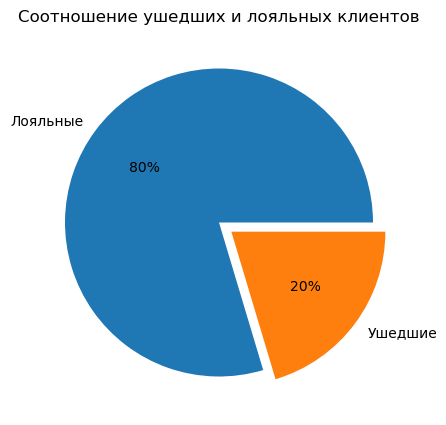

In [62]:
# Подсчитываем количество ушедших и лояльных клиентов
pie_data = churn_data['Exited'].value_counts()

# Строим круговую диаграмму
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.pie(
    pie_data,
    autopct='%.0f%%',
    labels=['Лояльные', 'Ушедшие'],
    explode=[0, 0.1])
ax.set_title('Соотношение ушедших и лояльных клиентов')

plt.show()

_Все очень просто - лояльных клиентов в 4 раза больше, чем ушедших (80% против 20%)._

**9.2** Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Количество клиентов с менее чем 2500$ на счете: 3617


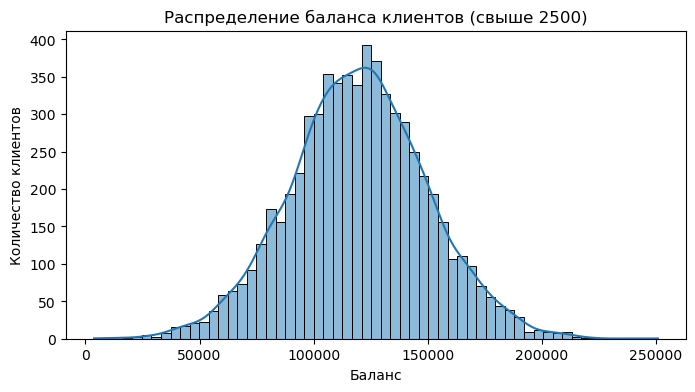

In [63]:
# Фильтруем данные по балансу и считаем количество клиентов с 0 на счете
filtered_data = churn_data[churn_data['Balance'] > 2_500]
print(f'Количество клиентов с менее чем 2500$ на счете: {churn_data.shape[0] - filtered_data.shape[0]}')

# Строим гистограмму распределения баланса клиентов
fig = plt.figure(figsize=(8, 4))
hist = sns.histplot(data=filtered_data, x='Balance', kde=True)
hist.set_title('Распределение баланса клиентов (свыше 2500)')
hist.set_xlabel('Баланс')
hist.set_ylabel('Количество клиентов')

plt.show()

_Баланс клиентов банка имеет нормальное распределение и без выбросов. Если конечно не учитывать, что мы отфильтровали около 37% клиентов с балансом на счете менее 2500$._

**9.3** Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

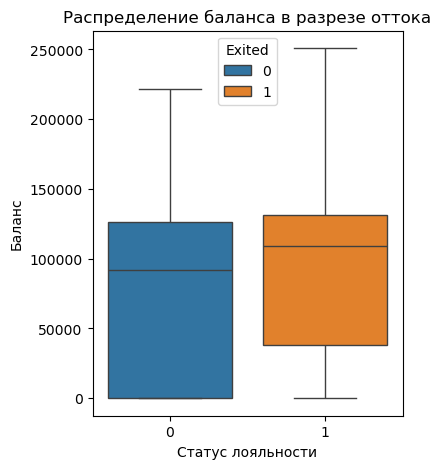

In [64]:
# Строим коробчатую диаграмму распределения баланса в разрезе оттока
fig = plt.figure(figsize=(4, 5))
box = sns.boxplot(data=churn_data, x='Exited', y='Balance', hue='Exited')
box.set_title('Распределение баланса в разрезе оттока')
box.set_xlabel('Статус лояльности')
box.set_ylabel('Баланс')

plt.show()

_У ушедших клиентов на счету было больше денег, чем у оставшихся. Предположим, что чем больше денег у человека, тем требовательней он к сервису. Если банк предлагает только банальные депозиты, а конкурент - акции и золото, то богатый клиент уйдет желая увеличить свой капитал._

_На боксплоте видно, что ящик лояльных клиентов более растянут, имеет начало в 0$ на балансе, а медиана ниже, чем закрывших счет клиентов._

**9.4** Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

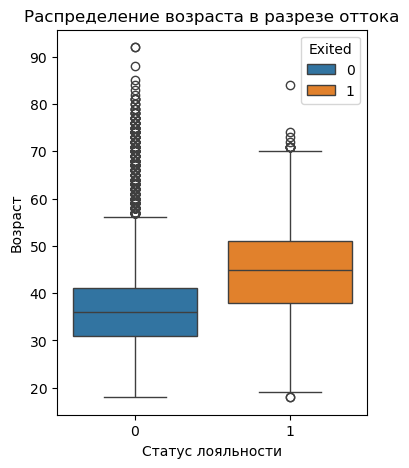

In [65]:
# Строим коробчатую диаграмму распределения возраста в разрезе оттока
fig = plt.figure(figsize=(4, 5))
box = sns.boxplot(data=churn_data, x='Exited', y='Age', hue='Exited')
box.set_title('Распределение возраста в разрезе оттока')
box.set_xlabel('Статус лояльности')
box.set_ylabel('Возраст')

plt.show()

_Если брать во внимание гипотезу подмеченную в задании 9.3, что "уходят богатые, которым мало услуг в банке" с новыми данными, то можно сделать следующий инсайт: банк теряет свою самую ценную аудиторию - состоявшихся платежеспособных людей среднего возраста (38-51 лет), у который карьера в пике и есть накопления. Молодежь (до 35 лет) склона оставаться, но денег и них меньше._

_Выбросы наблюдаются в обоих когортах, однако у лояльных их больше. Это может быть связано медианной (35-36 лет). Пожилые люди, которые остаются в банке, статистически являются аномалией (выбросами) на фоне молодежи._

_Банку нужно сосредоточиться на старшем сегменте и срочно вводить премиальные продукты для них. Данный инсайт предварителен._

**9.5** Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

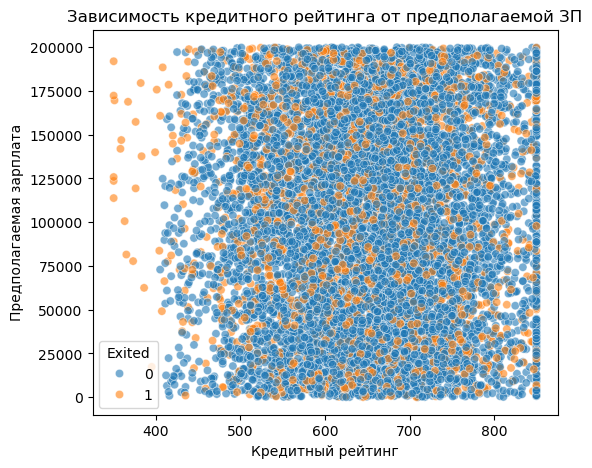

In [66]:
# Строим диаграмму рассеяния зависимости кредитного рейтинга от предполагаемой зарплаты
fig = plt.figure(figsize=(6, 5))
scatter = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    alpha=0.6)
scatter.set_title('Зависимость кредитного рейтинга от предполагаемой ЗП')
scatter.set_xlabel('Кредитный рейтинг')
scatter.set_ylabel('Предполагаемая зарплата')

plt.show()

_Зависимость между признаками кредитного рейтинга и предполагаемой зарплатой отсутствует. Это означает, что зарплата клиента никака не влияет на его кредитный рейтинг. Человек с маленькой ЗП может иметь высокий рейтинг (потому что исправно платит), а миллионер - низкий (потому что допускал просрочки). Также эти два фактора в сочетании не могут быть индикатором оттока (точки не образуют группу на диаграмме рассеяния)._

**9.6** Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Доля женщин-клиентов: 0.4543


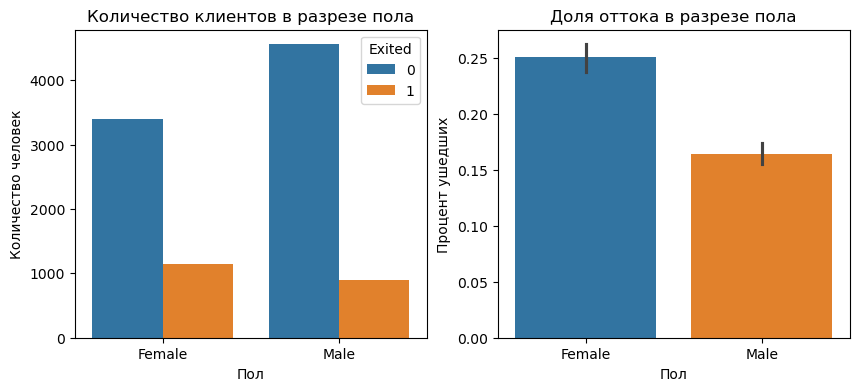

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

print(f'Доля женщин-клиентов: {churn_data['Gender'].value_counts(normalize=True).loc['Female']}')

# Строим частотное распределение количества клиентов в разрезе пола и статуса лояльности
count = sns.countplot(data=churn_data, x='Gender', hue='Exited', ax=ax[0])
count.set_title('Количество клиентов в разрезе пола')
count.set_xlabel('Пол')
count.set_ylabel('Количество человек')

# Строим столбчатую диаграмму среднего оттока в разрезе пола
bar = sns.barplot(data=churn_data, x='Gender', y='Exited', hue='Gender', ax=ax[1])
bar.set_title('Доля оттока в разрезе пола')
bar.set_xlabel('Пол')
bar.set_ylabel('Процент ушедших')

plt.show()

_По частотному распределению количества клиентов в разрезе пола видно, что наблюдается критическая ситуация с женской аудиторией. Женщины составляют меньшую часть базы клиентов банка (45%), но формируют большую часть оттока банка._

_По столбчатой диаграмме доли оттока в разрезе пола видно, что вероятность потери клиентки (25%) в 1,5 раза выше, чем вероятность потери клиента-мужчины (16%)._

_Вероятно банку нужно пересмотреть продуктовую линейку и маркетинговую коммуникацию для женской аудитории: например, lifestyle-сервисы и повысить кэшбеки с сервисов популярных у данной категории клиентов. Но это пока предварительный инсайт, который нужно проверить._

**9.7** Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

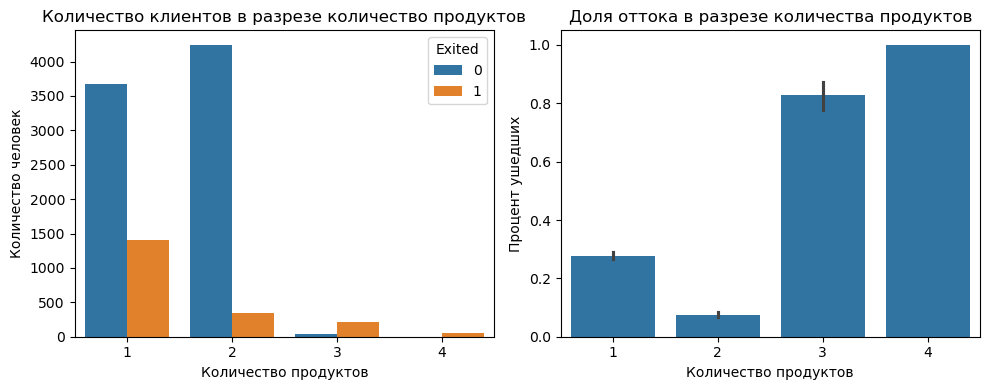

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Строим частотное распределение количества клиентов по числу продуктов и статусу лояльности
count = sns.countplot(data=churn_data, x='NumOfProducts', hue='Exited', ax=ax[0])
count.set_title('Количество клиентов в разрезе количество продуктов')
count.set_xlabel('Количество продуктов')
count.set_ylabel('Количество человек')

# Строим столбчатую диаграмму среднего оттока в разрезе числа продуктов
bar = sns.barplot(data=churn_data, x='NumOfProducts', y='Exited', ax=ax[1])
bar.set_title('Доля оттока в разрезе количества продуктов')
bar.set_xlabel('Количество продуктов')
bar.set_ylabel('Процент ушедших')

plt.tight_layout()
plt.show()

_Графики показывают очень интересные данные._
- _**1 продукт**: отток высокий (много оранжевого);_
- _**2 продукта**: отток самый минимальный. Инсайт: люди с 2 продуктами - самые лояльные клиенты;_
- _**3 продукта**: люди с таким количеством почти всегда уходят (вероятность 80%);_
- _**4 продукта**: все клиенты уходят._

_Вероятно клиентам не хватает продуктов банка и перебрав все они понимают, что нужного нету и уходят к конкурентам._